# Análisis de ventas

#### Librerías necesarias

In [1]:
import pandas as pd
import os

#### Necesitamos unir los doce archivos de ventas en uno solo

In [10]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

archivos = [archivo for archivo in os.listdir('./Sales_Data')]

datos_meses = pd.DataFrame() 

for archivo in archivos:
    df = pd.read_csv("./Sales_Data/"+archivo)
    datos_meses = pd.concat([datos_meses,df])

datos_meses.to_csv("datos_completos.csv", index = False)

#### Leemos el archivo completo

In [2]:
datos = pd.read_csv('datos_completos.csv')
datos.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### ¡Limpiemos los datos!

#### Eliminemos las filas que son NaN (Not a Number)

In [3]:
nan_df = datos[datos.isna().any(axis=1)]
nan_df.head()

datos = datos.dropna(how='all')
datos.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Cuando intentamos convertir la columna de mes a entero apareció en error donde no se podía convertir 'Or' en entero

In [4]:
datos = datos[datos['Order Date'].str[0:2] != 'Or']

#### Convertamos las columnas al tipo de datos correcto

In [5]:
datos['Quantity Ordered'] = pd.to_numeric(datos['Quantity Ordered'])
datos['Price Each'] = pd.to_numeric(datos['Price Each'])

### Hagamos unas transformaciones antes

#### Agreguemos una columna de mes

In [6]:
datos['Mes'] = datos['Order Date'].str[0:2]
datos['Mes'] = datos['Mes'].astype('int32')
datos.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Agregamos una columna de ventas

In [7]:
datos['Ventas'] = datos['Quantity Ordered']*datos['Price Each']
datos.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Ventas
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Agregar una columna de ciudad
###### Un aspecto que debemos tener en cuenta es que las ciudades pueden estar duplicadas por lo que necesitamos el estado también.

In [8]:
#Usaremos el método .apply()
def obtener_ciudad(direccion):
    return direccion.split(',')[1]

def obtener_estado(direccion):
    return direccion.split(',')[2].split(' ')[1]

datos['Ciudad'] = datos['Purchase Address'].apply(lambda x: f"{obtener_ciudad(x)} ({obtener_estado(x)})")

datos.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Ventas,Ciudad
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)



#### Pregunta 1: ¿Cuál fue nuestro mejor mes? ¿cuánto ganamos en dicho mes?

In [9]:
resultados = datos.groupby('Mes').sum()

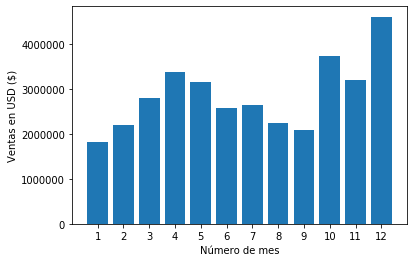

In [10]:
import matplotlib.pyplot as plt

meses = range(1,13)
plt.bar(meses, resultados['Ventas'])
plt.xticks(meses)
plt.ylabel('Ventas en USD ($)')
plt.xlabel('Número de mes')
plt.show()

#### Pregunta 2: ¿Cuál es la ciudad con las ventas más altas?

In [11]:
resultados = datos.groupby('Ciudad').sum()
resultados

,Quantity Ordered,Price Each,Mes,Ventas
Ciudad,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


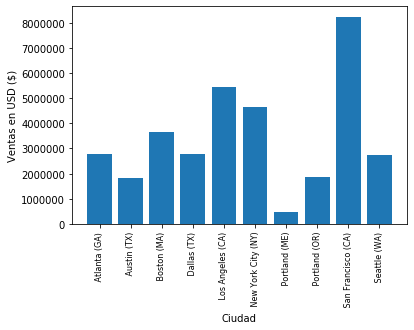

In [12]:
import matplotlib.pyplot as plt

ciudades = [ciudad for ciudad,df in datos.groupby('Ciudad')]
        #Si pusieramos datos['Ciudad'].unique() tendríamos un problema en el ordenamiento
        #para presentarlo en el gráfico porque se ordenan de forma independiente.

plt.bar(ciudades, resultados['Ventas'])
plt.xticks(ciudades, rotation = 'vertical', size = 8)
plt.ylabel('Ventas en USD ($)')
plt.xlabel('Ciudad')
plt.show()

#### Pregunta 3: ¿A qué hora deberíamos mostrar nuestra publicidad para maximizar la probabilidad de vista por los clientes?

In [13]:
datos['Order Date'] = pd.to_datetime(datos['Order Date'])

In [14]:
datos['Hora'] = datos['Order Date'].dt.hour
datos['Minuto'] = datos['Order Date'].dt.minute
datos.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Ventas,Ciudad,Hora,Minuto
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


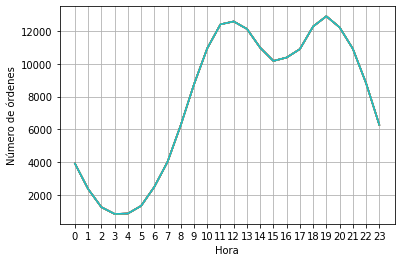

In [15]:
horas = [hora for hora,df in datos.groupby('Hora')]

plt.plot(horas, datos.groupby(['Hora']).count())
plt.xticks(horas)
plt.xlabel('Hora')
plt.ylabel('Número de órdenes')
plt.grid()
plt.show()

#La recomendación es que lo haga entre 11:00 h y 19:00 h.

#### Pregunta 4: ¿Qué productos son los que se venden más juntos?

In [16]:
df = datos[datos['Order ID'].duplicated(keep=False)]

df['Agrupado'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Agrupado']].drop_duplicates()

df.head()

C:\Users\jesus\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Agrupado
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [17]:
#Usaremos estas paqueterías para contar pares únicos 
from itertools import combinations
from collections import Counter

count = Counter()

for fila in df['Agrupado']:
    fila_lista = fila.split(',')
    count.update(Counter(combinations(fila_lista,2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Pregunta 6: ¿Qué producto se vendió más? ¿Por qué crees que se vendió más?

In [18]:
datos.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Ventas,Ciudad,Hora,Minuto
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


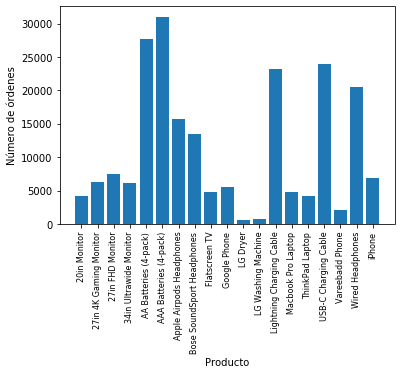

In [29]:
por_producto = datos.groupby('Product')
por_cantidad = por_producto.sum()['Quantity Ordered']

productos = [producto for producto,df in por_producto]

plt.bar(productos, por_cantidad)
plt.ylabel('Número de órdenes')
plt.xlabel('Producto')
plt.xticks(productos, rotation = 'vertical', size = 8)
plt.show()

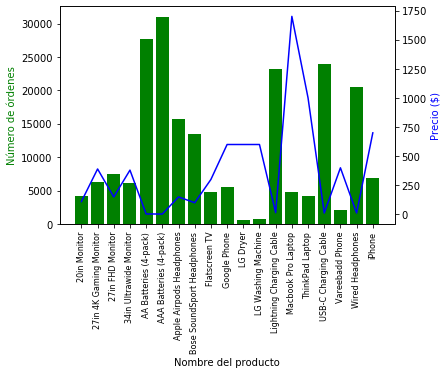

In [35]:
precios = datos.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(productos, por_cantidad, color='g')
ax2.plot(productos, precios, 'b-')

ax1.set_xlabel('Nombre del producto')
ax1.set_ylabel('Número de órdenes', color = 'g')
ax2.set_ylabel('Precio ($)', color = 'b')
ax1.set_xticklabels(productos, rotation = 'vertical', size=8)


plt.show()